
<a id='matsuyama'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Globalization and Cycles

## Colab Instructions

Colab does not have direct Julia support, and it must be installed each time you are working on a notebook.  

Instructions:

1. Ignore any errors about a missing kernel when loading the notebook.  Choose `Run Anyway` when it prompts that the notebook wasn't authored by google.

2. Run the cell below this with `Shift+Enter`.
    -  It will **5 to 8 minutes** the first time you run it for Julia and key packages to install

3. Refresh your browser, and then execute any code as normal.
  - Even after installation, there will be more precompiling latency for some packages. 

In [ ]:
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.4/julia-1.4.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
    julia -e 'using Pkg; pkg"add IJulia InstantiateFromURL; precompile;"'
    julia -e 'using InstantiateFromURL; github_project("QuantEcon/quantecon-notebooks-julia", version = "0.7.0", instantiate = true, precompile = false); using Plots, Distributions, Parameters, NLsolve, ForwardDiff, Expectations'
    echo 'Done'
fi


## Colab Instructions

Colab does not have direct Julia support, and it must be installed each time you are working on a notebook.  

Instructions:

1. Ignore any errors about a missing kernel when loading the notebook.  Choose `Run Anyway` when it prompts that the notebook wasn't authored by google.

2. Run the cell below this with `Shift+Enter`.
    -  It will **5 to 8 minutes** the first time you run it for Julia and key packages to install

3. Refresh your browser, and then execute any code as normal.
  - Even after installation, there will be more precompiling latency for some packages. 

In [ ]:
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.4/julia-1.4.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
    julia -e 'using Pkg; pkg"add IJulia InstantiateFromURL; precompile;"'
    julia -e 'using InstantiateFromURL; github_project("QuantEcon/quantecon-notebooks-julia", version = "0.7.0", instantiate = true, precompile = false); using Plots, Distributions, Parameters, NLsolve, ForwardDiff, Expectations'
    echo 'Done'
fi


## Contents

- [Globalization and Cycles](#Globalization-and-Cycles)  
  - [Overview](#Overview)  
  - [Key Ideas](#Key-Ideas)  
  - [Model](#Model)  
  - [Simulation](#Simulation)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

Co-authored with Chase Coleman

## Overview

In this lecture, we review the paper [Globalization and Synchronization of Innovation Cycles](http://www.centreformacroeconomics.ac.uk/Discussion-Papers/2015/CFMDP2015-27-Paper.pdf) by [Kiminori Matsuyama](http://faculty.wcas.northwestern.edu/~kmatsu/), [Laura Gardini](http://www.mdef.it/index.php?id=32) and [Iryna Sushko](http://irynasushko.altervista.org/).

This model helps us understand several interesting stylized facts about the world economy.

One of these is synchronized business cycles across different countries.

Most existing models that generate synchronized business cycles do so by assumption, since they tie output in each country to a common shock.

They also fail to explain certain features of the data, such as the fact that the degree of synchronization tends to increase with trade ties.

By contrast, in the model we consider in this lecture, synchronization is both endogenous and increasing with the extent of trade integration.

In particular, as trade costs fall and international competition increases, innovation incentives become aligned and countries synchronize their innovation cycles.

### Background

The model builds on work by Judd [[Jud85]](../zreferences.html#judd1985), Deneckner and Judd [[DJ92]](../zreferences.html#deneckere1992) and Helpman and Krugman [[HK85]](../zreferences.html#helpman1985) by developing a two country model with trade and innovation.

On the technical side, the paper introduces the concept of [coupled oscillators](https://en.wikipedia.org/wiki/Oscillation#Coupled_oscillations) to economic modeling.

As we will see, coupled oscillators arise endogenously within the model.

Below we review the model and replicate some of the results on synchronization of innovation across countries.

## Key Ideas

It is helpful to begin with an overview of the mechanism.

### Innovation Cycles

As discussed above, two countries produce and trade with each other.

In each country, firms innovate, producing new varieties of goods and, in doing so, receiving temporary monopoly power.

Imitators follow and, after one period of monopoly, what had previously been new varieties now enter competitive production.

Firms have incentives to innovate and produce new goods when the mass of varieties of goods currently in production is relatively low.

In addition, there are strategic complementarities in the timing of innovation.

Firms have incentives to innovate in the same period, so as to avoid competing with substitutes that are competitively produced.

This leads to temporal clustering in innovations in each country.

After a burst of innovation, the mass of goods currently in production increases.

However, goods also become obsolete, so that not all survive from period to period.

This mechanism generates a cycle, where the mass of varieties increases through simultaneous innovation and then falls through obsolescence.

### Synchronization

In the absence of trade, the timing of innovation cycles in each country is decoupled.

This will be the case when trade costs are prohibitively high.

If trade costs fall, then goods produced in each country penetrate each other’s markets.

As illustrated below, this leads to synchonization of business cycles across the two countries.

## Model

Let’s write down the model more formally.

(The treatment is relatively terse since full details can be found in [the original paper](http://www.centreformacroeconomics.ac.uk/Discussion-Papers/2015/CFMDP2015-27-Paper.pdf))

Time is discrete with $ t = 0, 1, \dots $.

There are two countries indexed by $ j $ or $ k $.

In each country, a representative household inelastically supplies $ L_j $ units of labor at wage rate $ w_{j, t} $.

Without loss of generality, it is assumed that $ L_{1} \geq L_{2} $.

Households consume a single nontradeable final good which is produced competitively.

Its production involves combining two types of tradeable intermediate inputs
via

$$
Y_{k, t} = C_{k, t} = \left( \frac{X^o_{k, t}}{1 - \alpha} \right)^{1-\alpha} \left( \frac{X_{k, t}}{\alpha} \right)^{\alpha}
$$

Here $ X^o_{k, t} $ is a homogeneous input which can be produced from labor using a linear, one-for-one technology.

It is freely tradeable, competitively supplied, and homogeneous across countries.

By choosing the price of this good as numeraire and assuming both countries find it optimal to always produce the homogeneous good, we can set $ w_{1, t} = w_{2, t} = 1 $.

The good $ X_{k, t} $ is a composite, built from many differentiated goods via

$$
X_{k, t}^{1 - \frac{1}{\sigma}} = \int_{\Omega_t} \left[ x_{k, t}(\nu) \right]^{1 - \frac{1}{\sigma}} d \nu
$$

Here $ x_{k, t}(\nu) $ is the total amount of a differentiated good $ \nu \in \Omega_t $ that is produced.

The parameter $ \sigma > 1 $ is the direct partial elasticity of substitution between a pair of varieties and $ \Omega_t $ is the set of varieties available in period
$ t $.

We can split the varieties into those which are supplied competitively and those supplied monopolistically; that is, $ \Omega_t = \Omega_t^c + \Omega_t^m $.

### Prices

Demand for differentiated inputs is

$$
x_{k, t}(\nu) = \left( \frac{p_{k, t}(\nu)}{P_{k, t}} \right)^{-\sigma} \frac{\alpha  L_k}{P_{k, t}}
$$

Here

- $ p_{k, t}(\nu) $ is the price of the variety $ \nu $ and  
- $ P_{k, t} $ is the price index for differentiated inputs in $ k $,
  defined by  


$$
\left[ P_{k, t} \right]^{1 - \sigma} = \int_{\Omega_t} [p_{k, t}(\nu) ]^{1-\sigma} d\nu
$$

The price of a variety also depends on the origin, $ j $, and destination, $ k $, of the goods because shipping
varieties between countries incurs an iceberg trade cost
$ \tau_{j,k} $.

Thus the effective price in country $ k $ of a variety $ \nu $ produced in country $ j $ becomes $ p_{k, t}(\nu) = \tau_{j,k} \, p_{j, t}(\nu) $.

Using these expressions, we can derive the total demand for each variety,
which is

$$
D_{j, t}(\nu) = \sum_k \tau_{j, k} x_{k, t}(\nu) = \alpha A_{j, t}(p_{j, t}(\nu))^{-\sigma}
$$

where

$$
A_{j, t} := \sum_k \frac{\rho_{j, k}  L_{k}}{(P_{k, t})^{1 - \sigma}}
\quad \text{and} \quad
\rho_{j, k} = (\tau_{j, k})^{1 - \sigma} \leq 1
$$

It is assumed that $ \tau_{1,1} = \tau_{2,2} = 1 $ and $ \tau_{1,2} = \tau_{2,1} = \tau $ for some $ \tau > 1 $, so that

$$
\rho_{1,2} = \rho_{2,1} = \rho := \tau^{1 - \sigma} < 1
$$

The value $ \rho \in [0, 1) $ is a proxy for the degree of globalization.

Producing one unit of each differentiated variety requires $ \psi $ units of labor, so the marginal cost is equal to $ \psi $ for $ \nu \in \Omega_{j, t} $.

Additionally, all competitive varieties will have the same price (because of equal marginal cost), which means that, for all $ \nu \in \Omega^c $,

$$
p_{j, t}(\nu) = p_{j, t}^c := \psi
\quad \text{and} \quad
D_{j, t} = y_{j, t}^c := \alpha A_{j, t} (p_{j, t}^c)^{-\sigma}
$$

Monopolists will have the same marked-up price, so, for all $ \nu \in \Omega^m $ ,

$$
p_{j, t}(\nu) = p_{j, t}^m := \frac{\psi }{1 - \frac{1}{\sigma}}
\quad \text{and} \quad
D_{j, t} = y_{j, t}^m  := \alpha A_{j, t} (p_{j, t}^m)^{-\sigma}
$$

Define

$$
\theta
:= \frac{p_{j, t}^c}{p_{j, t}^m} \frac{y_{j, t}^c}{y_{j, t}^m}
= \left(1 - \frac{1}{\sigma} \right)^{1-\sigma}
$$

Using the preceding definitions and some algebra, the price indices can now be rewritten as

$$
\left(\frac{P_{k,t}}{\psi}\right)^{1-\sigma} = M_{k,t}  + \rho M_{j,t}
\quad \text{where} \quad
M_{j,t} := N_{j,t}^c + \frac{N_{j,t}^m}{ \theta}
$$

The symbols $ N_{j, t}^c $ and $ N_{j, t}^m $ will denote the measures of $ \Omega^c $ and $ \Omega^m $ respectively.

### New Varieties

To introduce a new variety, a firm must hire $ f $ units of labor per variety in each country.

Monopolist profits must be less than or equal to zero in expectation, so

$$
N_{j,t}^m \geq 0, \quad
\pi_{j, t}^m := (p_{j, t}^m - \psi) y_{j, t}^m - f \leq 0
\quad \text{and} \quad
\pi_{j, t}^m N_{j,t}^m = 0
$$

With further manipulations, this becomes

$$
N_{j,t}^m = \theta(M_{j,t} - N_{j,t}^c) \geq 0,
\quad
\frac{1}{\sigma}
\left[
    \frac{\alpha L_j}{\theta(M_{j,t} + \rho M_{k,t})}
    +
    \frac{\alpha L_k}{\theta(M_{j,t} + M_{k,t} / \rho)}
\right]
\leq f
$$

### Law of Motion

With $ \delta $ as the exogenous probability of a variety becoming obsolete,
the dynamic equation for the measure of firms becomes

$$
N_{j, t+1}^c = \delta (N_{j, t}^c + N_{j, t}^m) = \delta (N_{j, t}^c + \theta(M_{j, t} - N_{j, t}^c))
$$

We will work with a normalized measure of varieties

$$
n_{j, t} := \frac{\theta \sigma f N_{j, t}^c}{\alpha (L_1 + L_2)},
\quad
i_{j, t} := \frac{\theta \sigma f N_{j, t}^m}{\alpha (L_1 + L_2)},
\quad
m_{j, t} := \frac{\theta \sigma f M_{j, t}}{\alpha (L_1 + L_2)} = n_{j, t} + \frac{i_{j, t}}{\theta}
$$

We also use $ s_j := \frac{L_j}{L_1 + L_2} $ to be the share of labor employed in country $ j $.

We can use these definitions and the preceding expressions to obtain a law of
motion for $ n_t := (n_{1, t}, n_{2, t}) $.

In particular, given an initial condition, $ n_0 = (n_{1, 0}, n_{2, 0}) \in \mathbb{R}_{+}^{2} $, the equilibrium trajectory, $ \{ n_t \}_{t=0}^{\infty} = \{ (n_{1, t}, n_{2, t}) \}_{t=0}^{\infty} $, is obtained by iterating on $ n_{t+1} = F(n_t) $ where $ F : \mathbb{R}_{+}^{2} \rightarrow \mathbb{R}_{+}^{2} $ is given by

$$
\begin{aligned}
  F(n_t)
  &=
  \begin{cases}
      \big( \delta (\theta s_1(\rho) + (1-\theta) n_{1, t}), \delta (\theta s_2(\rho) + (1-\theta) n_{2, t}) \big) \; & \text{for } n_t \in D_{LL} \\
      \big( \delta n_{1, t}, \delta n_{2, t} \big) \; &\text{for } n_t \in D_{HH}  \\
      \big( \delta n_{1, t}, \delta (\theta h_2(n_{1, t}) + (1-\theta) n_{2, t}) \big) &\text{for } n_t \in D_{HL}  \\
      \big( \delta (\theta h_1(n_{2, t}) + (1-\theta) n_{1, t}, \delta n_{2, t}) \big) &\text{for } n_t \in D_{LH}
  \end{cases}
\end{aligned}
$$

Here

$$
\begin{aligned}
      D_{LL} & := \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_j \leq s_j(\rho) \} \\
      D_{HH} & := \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_j \geq h_j(\rho) \} \\
      D_{HL} & :=  \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_1 \geq s_1(\rho) \text{ and } n_2 \leq h_2(n_1) \} \\
      D_{LH} & :=  \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_1 \leq h_1(n_2) \text{ and } n_2 \geq s_2(\rho) \}
\end{aligned}
$$

while

$$
s_1(\rho) = 1 - s_2(\rho)
= \min \left\{ \frac{s_1 - \rho s_2}{1 - \rho}, 1 \right\}
$$

and $ h_j(n_k) $ is defined implicitly by the equation

$$
1 = \frac{s_j}{h_j(n_k) + \rho n_k} + \frac{s_k}{h_j(n_k) + n_k / \rho}
$$

Rewriting the equation above gives us a quadratic equation in terms of $ h_j(n_k) $.

Since we know $ h_j(n_k) > 0 $ then we can just solve the quadratic equation and return the positive root.

This gives us

$$
h_j(n_k)^2 + \left( (\rho + \frac{1}{\rho}) n_k - s_j - s_k \right) h_j(n_k) + (n_k^2 - \frac{s_j n_k}{\rho} - s_k n_k \rho) = 0
$$

## Simulation

Let’s try simulating some of these trajectories.

We will focus in particular on whether or not innovation cycles synchronize
across the two countries.

As we will see, this depends on initial conditions.

For some parameterizations, synchronization will occur for “most” initial conditions, while for others synchronization will be rare.

Here’s the main body of code.

### Setup

In [1]:
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.7.0")

In [2]:
using LinearAlgebra, Statistics
using Plots, Parameters
gr(fmt = :png);

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


┌ Warning: Module JSON with build ID 359299871038753 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1016


┌ Info: Skipping precompilation since __precompile__(false). Importing Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80].
└ @ Base loading.jl:1033


In [3]:
function h_j(j, nk, s1, s2, θ, δ, ρ)
    # Find out who's h we are evaluating
    if j == 1
        sj = s1
        sk = s2
    else
        sj = s2
        sk = s1
    end

    # Coefficients on the quadratic a x^2 + b x + c = 0
    a = 1.0
    b = ((ρ + 1 / ρ) * nk - sj - sk)
    c = (nk * nk - (sj * nk) / ρ - sk * ρ * nk)

    # Positive solution of quadratic form
    root = (-b + sqrt(b * b - 4 * a * c)) / (2 * a)

    return root
end

DLL(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ) =
    (n1 ≤ s1_ρ) && (n2 ≤ s2_ρ)

DHH(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ) =
    (n1 ≥ h_j(1, n2, s1, s2, θ, δ, ρ)) && (n2 ≥ h_j(2, n1, s1, s2, θ, δ, ρ))

DHL(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ) =
    (n1 ≥ s1_ρ) && (n2 ≤ h_j(2, n1, s1, s2, θ, δ, ρ))

DLH(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ) =
    (n1 ≤ h_j(1, n2, s1, s2, θ, δ, ρ)) && (n2 ≥ s2_ρ)

function one_step(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)
    # Depending on where we are, evaluate the right branch
    if DLL(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)
        n1_tp1 = δ * (θ * s1_ρ + (1 - θ) * n1)
        n2_tp1 = δ * (θ * s2_ρ + (1 - θ) * n2)
    elseif DHH(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)
        n1_tp1 = δ * n1
        n2_tp1 = δ * n2
    elseif DHL(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)
        n1_tp1 = δ * n1
        n2_tp1 = δ * (θ * h_j(2, n1, s1, s2, θ, δ, ρ) + (1 - θ) * n2)
    elseif DLH(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)
        n1_tp1 = δ * (θ * h_j(1, n2, s1, s2, θ, δ, ρ) + (1 - θ) * n1)
        n2_tp1 = δ * n2
    end

    return n1_tp1, n2_tp1
end

new_n1n2(n1_0, n2_0, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ) =
    one_step(n1_0, n2_0, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)

function pers_till_sync(n1_0, n2_0, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ,
                        maxiter, npers)

    # Initialize the status of synchronization
    synchronized = false
    pers_2_sync = maxiter
    iters = 0

    nsync = 0

    while (~synchronized) && (iters < maxiter)
        # Increment the number of iterations and get next values
        iters += 1

        n1_t, n2_t = new_n1n2(n1_0, n2_0, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)

        # Check whether same in this period
        if abs(n1_t - n2_t) < 1e-8
            nsync += 1
        # If not, then reset the nsync counter
        else
            nsync = 0
        end

        # If we have been in sync for npers then stop and countries
        # became synchronized nsync periods ago
        if nsync > npers
            synchronized = true
            pers_2_sync = iters - nsync
        end
        n1_0, n2_0 = n1_t, n2_t
    end
    return synchronized, pers_2_sync
end

function create_attraction_basis(s1_ρ, s2_ρ, s1, s2, θ, δ, ρ,
                                 maxiter, npers, npts)
    # Create unit range with npts
    synchronized, pers_2_sync = false, 0
    unit_range = range(0.0,  1.0, length = npts)

    # Allocate space to store time to sync
    time_2_sync = zeros(npts, npts)
    # Iterate over initial conditions
    for (i, n1_0) in enumerate(unit_range)
        for (j, n2_0) in enumerate(unit_range)
            synchronized, pers_2_sync = pers_till_sync(n1_0, n2_0, s1_ρ, s2_ρ,
                                                       s1, s2, θ, δ, ρ,
                                                       maxiter, npers)
            time_2_sync[i, j] = pers_2_sync
        end
    end
    return time_2_sync
end

# model
function MSGSync(s1 = 0.5, θ = 2.5, δ = 0.7, ρ = 0.2)
    # Store other cutoffs and parameters we use
    s2 = 1 - s1
    s1_ρ = min((s1 - ρ * s2) / (1 - ρ), 1)
    s2_ρ = 1 - s1_ρ

    return (s1 = s1, s2 = s2, s1_ρ = s1_ρ, s2_ρ = s2_ρ, θ = θ, δ = δ, ρ = ρ)
end

function simulate_n(model, n1_0, n2_0, T)
    # Unpack parameters
    @unpack s1, s2, θ, δ, ρ, s1_ρ, s2_ρ = model

    # Allocate space
    n1 = zeros(T)
    n2 = zeros(T)

    # Simulate for T periods
    for t in 1:T
        # Get next values
        n1[t], n2[t] = n1_0, n2_0
        n1_0, n2_0 = new_n1n2(n1_0, n2_0, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)
    end

    return n1, n2
end

function pers_till_sync(model, n1_0, n2_0,
                        maxiter = 500, npers = 3)
    # Unpack parameters
    @unpack s1, s2, θ, δ, ρ, s1_ρ, s2_ρ = model

    return pers_till_sync(n1_0, n2_0, s1_ρ, s2_ρ, s1, s2,
                        θ, δ, ρ, maxiter, npers)
end

function create_attraction_basis(model;
                                 maxiter = 250,
                                 npers = 3,
                                 npts = 50)
    # Unpack parameters
    @unpack s1, s2, θ, δ, ρ, s1_ρ, s2_ρ = model

    ab = create_attraction_basis(s1_ρ, s2_ρ, s1, s2, θ, δ,
                                 ρ, maxiter, npers, npts)
    return ab
end

create_attraction_basis (generic function with 2 methods)

### Time Series of Firm Measures

We write a short function below that exploits the preceding code and plots two time series.

Each time series gives the dynamics for the two countries.

The time series share parameters but differ in their initial condition.

Here’s the function

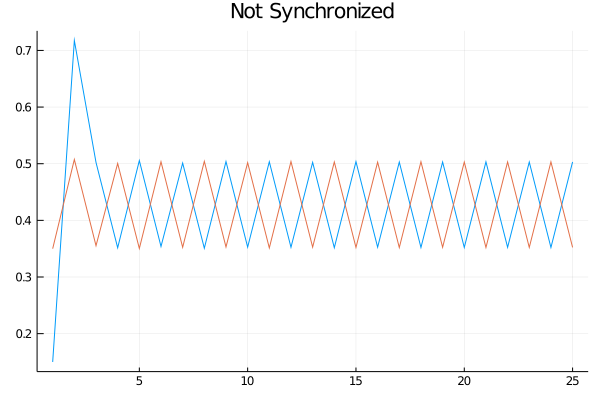

In [4]:
function plot_timeseries(n1_0, n2_0, s1 = 0.5, θ = 2.5, δ = 0.7, ρ = 0.2)
    model = MSGSync(s1, θ, δ, ρ)
    n1, n2 = simulate_n(model, n1_0, n2_0, 25)
    return [n1 n2]
end

# Create figures
data_ns = plot_timeseries(0.15, 0.35)
data_s = plot_timeseries(0.4, 0.3)

plot(data_ns, title = "Not Synchronized", legend = false)

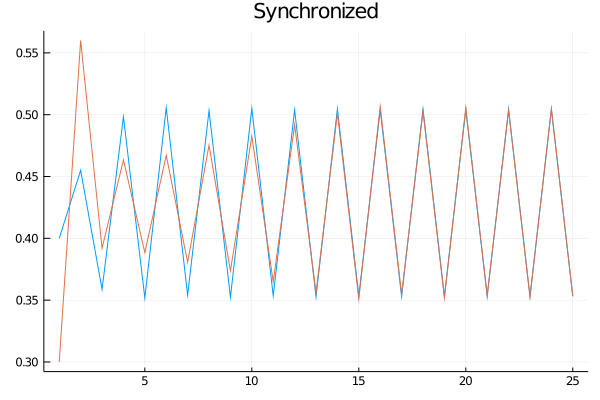

In [5]:
plot(data_s, title = "Synchronized", legend = false)

In the first case, innovation in the two countries does not synchronize.

In the second case different initial conditions are chosen, and the cycles
become synchronized.

### Basin of Attraction

Next let’s study the initial conditions that lead to synchronized cycles more
systematically.

We generate time series from a large collection of different initial
conditions and mark those conditions with different colors according to
whether synchronization occurs or not.

The next display shows exactly this for four different parameterizations (one
for each subfigure).

Dark colors indicate synchronization, while light colors indicate failure to synchronize.


<a id='matsrep'></a>
<img src="_static/figures/matsuyama_14.png" style="width:60%;">

  
As you can see, larger values of $ \rho $ translate to more synchronization.

You are asked to replicate this figure in the exercises.

## Exercises

### Exercise 1

Replicate the figure [shown above](#matsrep) by coloring initial conditions according to whether or not synchronization occurs from those conditions.

## Solutions

### Exercise 1

In [6]:
function plot_attraction_basis(s1 = 0.5, θ = 2.5, δ = 0.7, ρ = 0.2; npts = 250)
    # Create attraction basis
    unitrange = range(0,  1, length = npts)
    model = MSGSync(s1, θ, δ, ρ)
    ab = create_attraction_basis(model,npts=npts)
    plt = Plots.heatmap(ab, legend = false)
end

plot_attraction_basis (generic function with 5 methods)

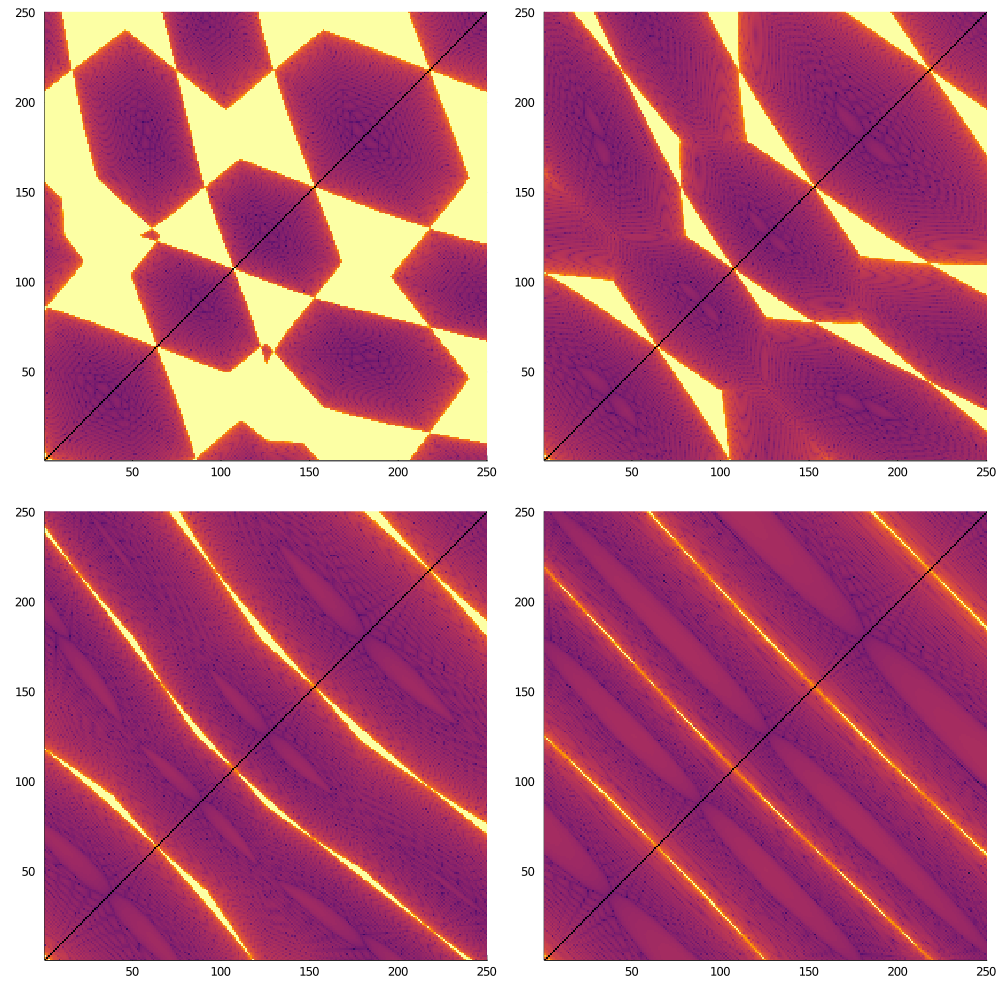

In [7]:
params = [[0.5, 2.5, 0.7, 0.2],
          [0.5, 2.5, 0.7, 0.4],
          [0.5, 2.5, 0.7, 0.6],
          [0.5, 2.5, 0.7, 0.8]]

plots = (plot_attraction_basis(p...) for p in params)
plot(plots..., size = (1000, 1000))